# Shopify Data Science Intern Challenge
### Harish Venkatesh 
##### harishven1996@gmail.com
##### https://www.linkedin.com/in/harishvenkatesh96/

## Question 1

Question 1: Given some sample data, write a program to answer the following: click here to access the required data set

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 
What metric would you report for this dataset?
What is its value?


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# read CSV

df = pd.read_csv("2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv")
df.head(20)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,3/13/2017 12:36
1,2,92,925,90,1,cash,3/3/2017 17:38
2,3,44,861,144,1,cash,3/14/2017 4:23
3,4,18,935,156,1,credit_card,3/26/2017 12:43
4,5,18,883,156,1,credit_card,3/1/2017 4:35
5,6,58,882,138,1,credit_card,3/14/2017 15:25
6,7,87,915,149,1,cash,3/1/2017 21:37
7,8,22,761,292,2,cash,3/8/2017 2:05
8,9,64,914,266,2,debit,3/17/2017 20:56
9,10,52,788,146,1,credit_card,3/30/2017 21:08


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
order_id          5000 non-null int64
shop_id           5000 non-null int64
user_id           5000 non-null int64
order_amount      5000 non-null int64
total_items       5000 non-null int64
payment_method    5000 non-null object
created_at        5000 non-null object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB


In [9]:
#Date is a non-null object, we will change it to date

df['created_at'] = df['created_at'].astype('datetime64[ns]') 
  
# Check the format of 'Date' column 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
order_id          5000 non-null int64
shop_id           5000 non-null int64
user_id           5000 non-null int64
order_amount      5000 non-null int64
total_items       5000 non-null int64
payment_method    5000 non-null object
created_at        5000 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 273.6+ KB


In [10]:
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:00
1,2,92,925,90,1,cash,2017-03-03 17:38:00
2,3,44,861,144,1,cash,2017-03-14 04:23:00
3,4,18,935,156,1,credit_card,2017-03-26 12:43:00
4,5,18,883,156,1,credit_card,2017-03-01 04:35:00


In [16]:
min(df['created_at'])

Timestamp('2017-03-01 00:08:00')

In [17]:
max(df['created_at'])

Timestamp('2017-03-30 23:55:00')

Dates range from (March 1st, 2017 to March 30th, 2017) - 30 day window

In [12]:
df.describe()


,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


## Average Order Value

#### Working roughly...

Average order value (AOV) tracks the average dollar amount spent each time a customer places an order on a website or mobile app. To calculate your company's average order value, simply divide total revenue by the number of orders.

In [32]:
print(sum(df['order_amount']))
print(sum(df['total_items']))

15725640
43936


### AOV for sample data (March's AOV)

In [33]:
# Average Order Value (AOV) 

sum(df['order_amount'])/sum(df['total_items'])

357.92152221412965

#### From the above calculation, Average Order value, AOV for march could be 357.92  $

## Exploratoy Data Analysis

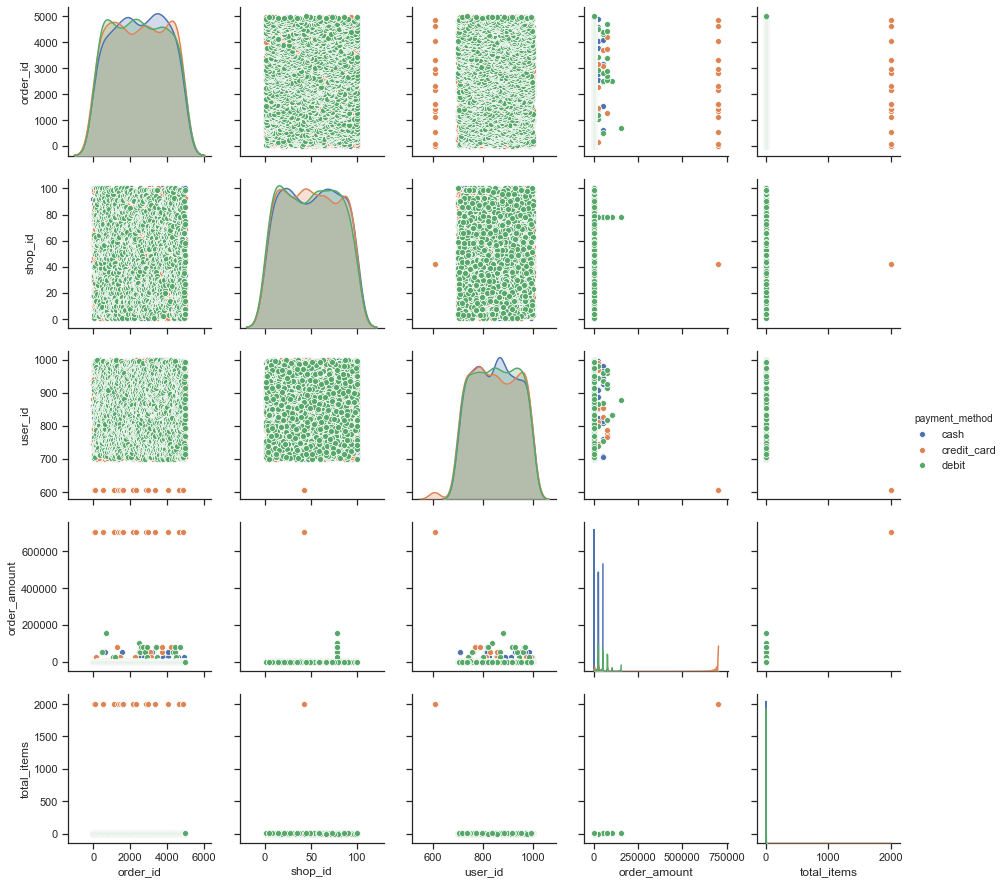

In [45]:
import seaborn as sns
sns.set(style="ticks")

sns.pairplot(df, hue="payment_method")

In [ ]:
df['date'] = [d.date() for d in df['created_at']]
df['time'] = [d.time() for d in df['created_at']]


In [48]:
df.head(10)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,date,time
0,1,53,746,224,2,cash,2017-03-13 12:36:00,2017-03-13,12:36:00
1,2,92,925,90,1,cash,2017-03-03 17:38:00,2017-03-03,17:38:00
2,3,44,861,144,1,cash,2017-03-14 04:23:00,2017-03-14,04:23:00
3,4,18,935,156,1,credit_card,2017-03-26 12:43:00,2017-03-26,12:43:00
4,5,18,883,156,1,credit_card,2017-03-01 04:35:00,2017-03-01,04:35:00
5,6,58,882,138,1,credit_card,2017-03-14 15:25:00,2017-03-14,15:25:00
6,7,87,915,149,1,cash,2017-03-01 21:37:00,2017-03-01,21:37:00
7,8,22,761,292,2,cash,2017-03-08 02:05:00,2017-03-08,02:05:00
8,9,64,914,266,2,debit,2017-03-17 20:56:00,2017-03-17,20:56:00
9,10,52,788,146,1,credit_card,2017-03-30 21:08:00,2017-03-30,21:08:00


In [50]:
df.sort_values(by='date')

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,date,time
1143,1144,3,946,296,2,debit,2017-03-01 10:00:00,2017-03-01,10:00:00
1610,1611,25,941,260,2,cash,2017-03-01 11:37:00,2017-03-01,11:37:00
1608,1609,18,864,156,1,credit_card,2017-03-01 22:15:00,2017-03-01,22:15:00
3146,3147,28,750,492,3,credit_card,2017-03-01 05:33:00,2017-03-01,05:33:00
3152,3153,46,727,166,1,cash,2017-03-01 03:24:00,2017-03-01,03:24:00
...,...,...,...,...,...,...,...,...,...
842,843,39,839,402,3,credit_card,2017-03-30 18:53:00,2017-03-30,18:53:00
3988,3989,27,714,169,1,credit_card,2017-03-30 19:00:00,2017-03-30,19:00:00
882,883,23,947,624,4,debit,2017-03-30 16:11:00,2017-03-30,16:11:00
954,955,37,776,568,4,credit_card,2017-03-30 15:39:00,2017-03-30,15:39:00


In [96]:
# grouping dates according to date

df_grouped = df.groupby(['shop_id']).sum()
df_grouped

,order_id,user_id,order_amount,total_items
shop_id,,,,
1,110641,36679,13588,86
2,126448,47370,9588,102
3,110682,40690,14652,99
4,140128,44189,13184,103
5,112423,38800,13064,92
6,143483,49818,22627,121
7,145326,47441,12208,109
8,138598,39932,11088,84
9,160256,49951,13806,117


In [97]:
sum(df_grouped['order_amount'])

15725640

In [98]:
df_grouped['price'] = df_grouped['order_amount']/df_grouped['total_items']
df_grouped

,order_id,user_id,order_amount,total_items,price
shop_id,,,,,
1,110641,36679,13588,86,158.0
2,126448,47370,9588,102,94.0
3,110682,40690,14652,99,148.0
4,140128,44189,13184,103,128.0
5,112423,38800,13064,92,142.0
6,143483,49818,22627,121,187.0
7,145326,47441,12208,109,112.0
8,138598,39932,11088,84,132.0
9,160256,49951,13806,117,118.0


In [99]:
df_grouped['shop'] = df_grouped.index
df_grouped.head()

,order_id,user_id,order_amount,total_items,price,shop
shop_id,,,,,,
1,110641,36679,13588,86,158.0,1
2,126448,47370,9588,102,94.0,2
3,110682,40690,14652,99,148.0,3
4,140128,44189,13184,103,128.0,4
5,112423,38800,13064,92,142.0,5


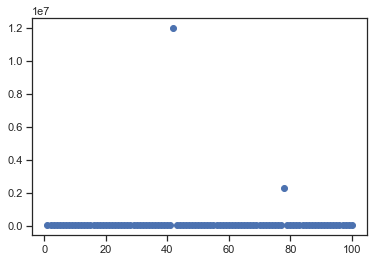

In [100]:
plt.scatter(df_grouped['shop'], df_grouped['order_amount'])
plt.show()

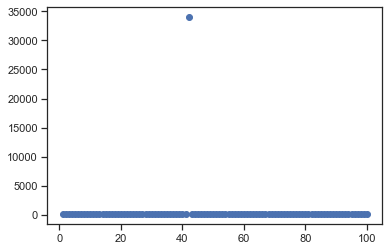

In [101]:
plt.scatter(df_grouped['shop'], df_grouped['total_items'])
plt.show()

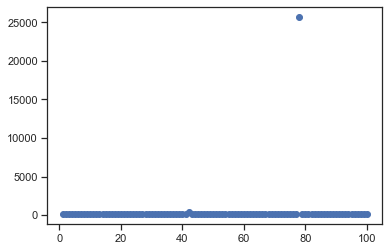

In [102]:
plt.scatter(df_grouped['shop'], df_grouped['price'])
plt.show()

Looking at the prices of sneakers at all 100 shops

Most of the sneakers ranges from 100 - 200

Suprisingly the price of sneakers at SHOP 78 is at 25725$, and sold 88 shoes

also price of sneakers at SHOP 42 is at 352$, and sold 34063 shoes 

#### Let's look at the mean price of the sneakers sold by these shops

In [103]:
df_grouped['price'].mean()

407.99

#### This will give us an average mean shoe price of 407 $

#### Let's remove shop 78, and observe the same

In [104]:
df_new = df_grouped.drop([78])
df_new['price'].mean()

152.26262626262627

#### Average price for shoes becomes 152.26 $

### Lets Visualize the Data

## Histogram of price distribution

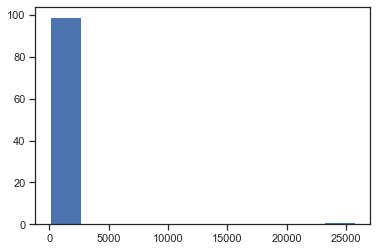

In [108]:
plt.hist(df_grouped['price'])
plt.show()

## Histogram of price distribution, after SHOP 78 removed

(array([ 8., 30., 37., 20.,  3.,  0.,  0.,  0.,  0.,  1.]),
 array([ 90. , 116.2, 142.4, 168.6, 194.8, 221. , 247.2, 273.4, 299.6,
        325.8, 352. ]),
 <a list of 10 Patch objects>)

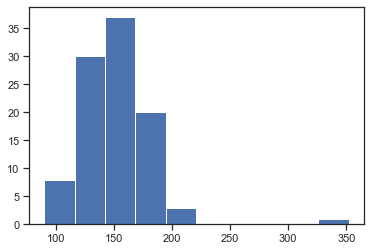

In [109]:
plt.hist(df_new['price'])

##### Adding bins to the same Histogram...

(array([ 3.,  5., 11., 19., 16., 21., 15.,  5.,  3.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 90. , 103.1, 116.2, 129.3, 142.4, 155.5, 168.6, 181.7, 194.8,
        207.9, 221. , 234.1, 247.2, 260.3, 273.4, 286.5, 299.6, 312.7,
        325.8, 338.9, 352. ]),
 <a list of 20 Patch objects>)

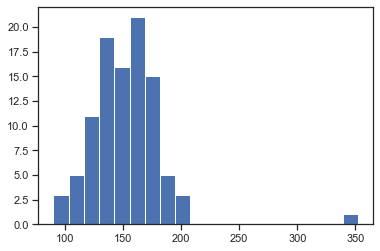

In [118]:

# Histogram of price distribution, after SHOP 78 removed

%matplotlib inline
plt.hist(df_new['price'], bins= 20)


## Can you see the diffeence??? Comparing data with and without SHOP 78

If we also remove the SHOP 42 data, this could be a perfect Normal distribution.
And will allow us to run all our significance or hypothesis tests over it. The previous distribution stops us from performing such test because of the assumptions they have before starting the test.

### Reason, it is the sample statistic error distribution that matters, not the sample data distribution

The data is certainly representative of a vast array of real-world scenarios and the in-sample data distribution is certainly non-normal.

#### Binomial vs. Non-binomial metrics

Binomial - A binomial metric is one that can only have two possible values: true or false, yes or no.

Non Binomial -  usually continuous, spanning from zero to plus infinity,
or from minus infinity to plus infinity.
These are usually “per user”, “per session” or “per order” metrics,
such as: average revenue per user (ARPU), average order value (AOV).

 Revenue-based metrics violate the normality assumption

Of course, it is impossible to get a true normal curve with just 5,000 readings <30 day window>, 
but the important thing is that the more simulations we run,
the more the values would converge to a true normal distribution.

#### The unknown variance of the sample mean makes is impossible to use calculators that work fine with binomial data.

We need to look at variance: the standard error of mean (SEM)

### Alternatively,

we could calculate the Total order amount divides by the total items bought together by all customers 

In [120]:
# For March data, 

sum(df['order_amount'])/sum(df['total_items'])


357.92152221412965

Gives us a value of 357.92

### We could also compare AOV at metrics Cost Per Order (CPO) 

Comparing AOV against Cost Per Order gives a great idea of the profits you make on each order. 

Consider your Cost Per Order is 1 and your AOV is 10, giving you a profit of 9 $ per order. 

But if  your Cost Per Order is 9 and your AOV is 10, giving you only a profit of 1 $ per order. 

## Question 2, (SQL)

Question 2: For this question you’ll need to use SQL. Follow this link to access the data set required for the challenge. Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.

#### 1. How many orders were shipped by Speedy Express in total?

SELECT o.ShipperID, s.ShipperName, count(OrderID) FROM Shippers as s INNER JOIN Orders as o on s.ShipperID = o.ShipperID where s.ShipperName = "Speedy Express" ;

-- 54 orders in total by Speedy Express



#### 2. What is the last name of the employee with the most orders?

SELECT e.LastName, count(OrderID) as "# Orders" FROM Employees as e INNER JOIN Orders as o on e.EmployeeID = o.EmployeeID group by o.EmployeeID order by Count(orderID) DESC LIMIT 1;

-- Peacock has the most orders<40 orders>



#### 3. What product was ordered the most by customers in Germany?


Select ProductName from Products where ProductID = (select ProductID from (select ProductID, Count(ProductID) from OrderDetails where orderID in(select OrderID from Orders as o where o.CustomerID in (select c.CustomerID from Orders as o inner join Customers as c  where c.Country = "Germany")) group by ProductID order by Count(ProductID) DESC) LIMIT 1);

-- Gorgonzola Telino

We write multiple Sub Queries here, first step comes as inner most query and the rest follows...
1. Get the customerID from Customer with country = Germany
2. Get the OrderID from Orders where CustomerID IN (values from prev step)
3. Get the ProductID and their count from OrderDetails by grouping
4. Order the above result in DESC and select top 1
5. From this we select only Product ID and Leave the Count
6. from the Products table, get the Product name for the obtained ProductID
        

    Select ProductName from Products where ProductID = 
  
    (select ProductID from 
  
    (select ProductID, Count(ProductID) from OrderDetails where orderID in
  
      (select OrderID from Orders as o where o.CustomerID in 
  
        (select c.CustomerID from Orders as o inner join Customers as c where c.Country = "Germany")
  
       )
  
       group by ProductID order by Count(ProductID) DESC) 
  
    LIMIT 1);